## Analysis for Instagram Data set
- In this project, I will work on analyzing Instagram data and aim to extract the most important insights and information to help users and account owners to deliver their content more effectively. This is done by looking at the most useful hashtags and determining which impression sources (like Home, Hashtags, or Explore) gather the most impressions and deliver content more successfully.

## Instagram dataset field description
---
- Below is a description of column fields in the Dataset:
---
#### Core Fields
- `Impressions`: The total number of times the post has been shown to users
- `From Home`: The number of impressions that came from users viewing their home feed
- `From Hashtags`:The number of impressions that came from users searching for or clicking on hashtags
- `From Explore`: The number of impressions that came from the Instagram Explore page
- `From Other`: The number of impressions that came from other sources (e.g., profile links, direct messages, saved posts)
- `Saves`: The number of times users have saved the post to their collections
- `Comments`: The total number of comments left on the post
- `Shares`: The number of times users have shared the post 
- `Likes`: The total number of likes the post has received
- `Profile Visits`: The number of times users visited the account's profile after viewing this specific post
- `Follows`: The number of new followers gained directly from this post
- `Caption`: The text description written by the user for the post
- `Hashtags`: A list of hashtags included in the post's caption or comments

### Questions to be Answered depending on the Analysis 
1. Hashtags vs Explore: Which traffic source generates higher total engagement across all interactions?
2. Which traffic source generates the highest number of Shares?
3. Is there a strong positive correlation between Profile Visits and gaining new Follows?
4. Does caption length impact overall engagement ?
5. Is there a correlation between the number of hashtags used in a post and the total Impressions received?
6. Do posts with higher comments also tend to have higher shares?
7. "What are the top 10%  posts with the highest engagement? 
8. Is there a strong correlation between the number of Shares a post receives and its overall engagement ?

In [4]:
# load needed modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly. express as px

In [5]:
# dissplay all data columns
pd.options.display.max_columns = None


##### Data Wrangling 
- Data Assessing by printing the first five rows

In [6]:
df = pd.read_csv(r"C:\Users\abdal\OneDrive\Desktop\Instagram data.csv", encoding='latin1')

In [7]:
# display first rows
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [8]:
# check for data size
df.shape

(119, 13)

- we found that data consists of 119 records(rows) and 13 feature (columns)

In [9]:
## check for data info (quality)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


- we found that there is no nulls or missing values
- all data types of features are integer except for caption and Hashtags are objects


#### Feature Engineering
- add 1 column to show caption length of each post
- add 1 column to view number of hashtags used in a post 
- add 1 column to calculate Interaction_Score or Total Engagement  (Likes + Comments+ Shares+ Likes)


In [10]:
# copy the dataframe
df_copy = df.copy()

In [11]:
# check for Duplicates 
df.duplicated().sum()

np.int64(17)

- there is 17 row duplicted

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# check for Duplicates 
df.duplicated().sum()

np.int64(0)

-no duplicated rows

In [14]:
#check for nulls 
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [15]:
# check for data size
df.shape

(102, 13)

In [16]:
# list data columns 
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [17]:
df.sample(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
11,3234,2414,476,185,75,122,8,14,151,15,0,Heres how to get the live stock price data of...,#python #pythonprogramming #pythonprojects #py...


In [18]:
# calculate number of hashtags used
df['Num_Hashtags']=df['Hashtags'].str.count('#')
# calculate caption lengh
df['Caption_length']=df['Caption'].str.len()
# calculate engagements using sum of likes,shares,comments,saves
df['Engagement'] = df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']

In [19]:
df.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Num_Hashtags,Caption_length,Engagement
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,22,112,274
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,18,187,439
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,18,117,184
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,11,202,402
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,29,178,228


In [20]:
# Divide posts based on dominant traffic source
hashtags_df= df[df['From Hashtags']>df['From Explore']]
explore_df=df[df['From Explore']>df['From Hashtags']]

In [21]:
#claculate Avg of total engagements for each traffic source
avg_hashtags=hashtags_df['Engagement'].mean()
avg_explore=explore_df['Engagement'].mean()

In [22]:
# Compare average Total Engagement
Comparison_Total=pd.DataFrame({'Avg Total Engagement':[avg_hashtags,avg_explore]},index=['Hashtags Dominant', 'Explore Dominant'])


In [23]:
Comparison_Total

,Avg Total Engagement
Hashtags Dominant,305.630952
Explore Dominant,551.555556


#it is clear that Explore traffic source  is twice the hashtags traffic source value

In [24]:
#reset columns of DataFrame
Comparison_Total_Reset = Comparison_Total.reset_index()
Comparison_Total_Reset.columns = ['Source', 'Avg Total Engagement']
print(Comparison_Total_Reset)

              Source  Avg Total Engagement
0  Hashtags Dominant            305.630952
1   Explore Dominant            551.555556


Text(0.5, 1.0, 'Comparison of Total Engagement by Traffic Source')

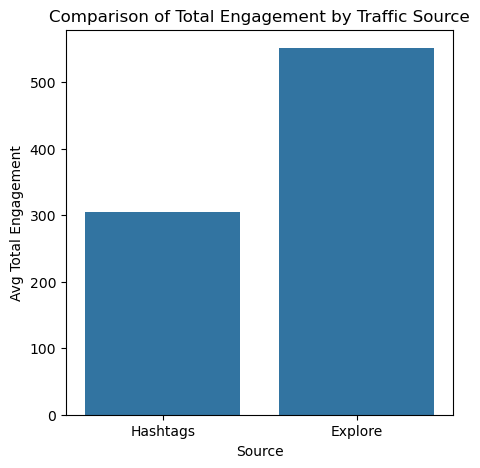

In [25]:
#plot bar chart
Comparison_Total_Reset['Source'] = Comparison_Total_Reset['Source'].replace({
    'Hashtags Dominant': 'Hashtags',
    'Explore Dominant': 'Explore'
})
plt.figure(figsize=(5,5))
sns.barplot(x='Source',y='Avg Total Engagement',data=Comparison_Total_Reset)
plt.title('Comparison of Total Engagement by Traffic Source')


## this chart visualize that posts from Explore source receive the highst Engagement



In [26]:
#calculate total traffic
df['Total_Traffic'] = df['From Home'] + df['From Hashtags'] + df['From Explore'] + df['From Other']

In [27]:
#calculate perecentage of Shares for each traffic source
df['Home_Shares'] = df['Shares'] * (df['From Home'] / df['Total_Traffic'])
df['Hashtags_Shares'] = df['Shares'] * (df['From Hashtags'] / df['Total_Traffic'])
df['Explore_Shares'] = df['Shares'] * (df['From Explore'] / df['Total_Traffic'])
df['Other_Shares'] = df['Shares'] * (df['From Other'] / df['Total_Traffic'])


In [28]:
#calculate sum of shares for each trafic source
FromHome_share_sum=df['Home_Shares'].sum()
FromHashtags_share_sum=df['Hashtags_Shares'].sum()
FromExplore_share_sum=df['Explore_Shares'].sum()
FromOther_share_sum=df['Other_Shares'].sum()

In [29]:
df_shares=pd.DataFrame({'Total Shares':[FromHome_share_sum,FromHashtags_share_sum,FromExplore_share_sum,FromOther_share_sum]},index=['Home_Shares','Hashtags_Shares','Explore_Shares','Other_Shares'])


In [30]:
df_shares

,Total Shares
Home_Shares,447.341465
Hashtags_Shares,287.417281
Explore_Shares,189.103464
Other_Shares,25.137790


In [31]:
#reset columns of DataFrame
df_shares_Reset = df_shares.reset_index()
df_shares_Reset.columns = ['Source', 'Shares']
print(df_shares_Reset)

            Source      Shares
0      Home_Shares  447.341465
1  Hashtags_Shares  287.417281
2   Explore_Shares  189.103464
3     Other_Shares   25.137790


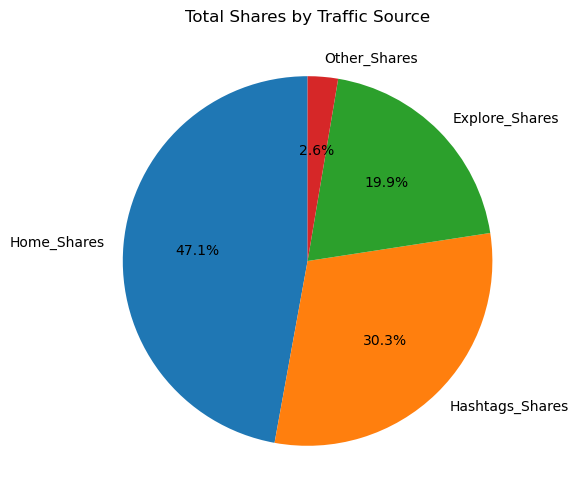

In [32]:
plt.figure(figsize=(6,6))
plt.pie(df_shares_Reset['Shares'], labels=df_shares_Reset['Source'], autopct='%1.1f%%', startangle=90)
plt.title('Total Shares by Traffic Source')
plt.show()

## Shares occure mostly from Home Source

In [33]:
df.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Num_Hashtags,Caption_length,Engagement,Total_Traffic,Home_Shares,Hashtags_Shares,Explore_Shares,Other_Shares
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,22,112,274,4289,3.014689,1.198415,0.721613,0.065283
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,18,187,439,5817,6.563177,4.423586,2.825511,0.187726
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,18,117,184,3806,0.547819,0.312139,0.000000,0.140042
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,11,202,402,4326,4.368932,1.004854,1.508091,0.118123
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,29,178,228,2275,2.996044,0.448352,0.490549,0.065055


In [34]:
#calculate correlation between profile visits and number of fpllowers
correlation=df[['Profile Visits','Follows']].corr()

In [35]:
print(correlation)

                Profile Visits   Follows
Profile Visits        1.000000  0.852748
Follows               0.852748  1.000000


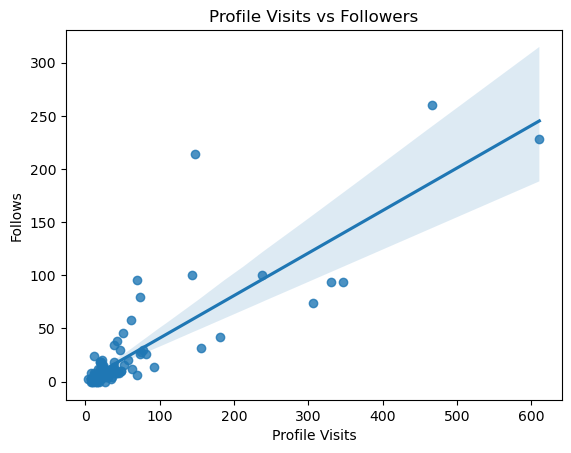

In [36]:
sns.regplot(data=df,x='Profile Visits',y='Follows')
plt.title('Profile Visits vs Followers')
plt.xlabel('Profile Visits')
plt.ylabel('Follows')
plt.show()

## There is a strong positive correlation (r = 0.85) between Profile Visits and Follows

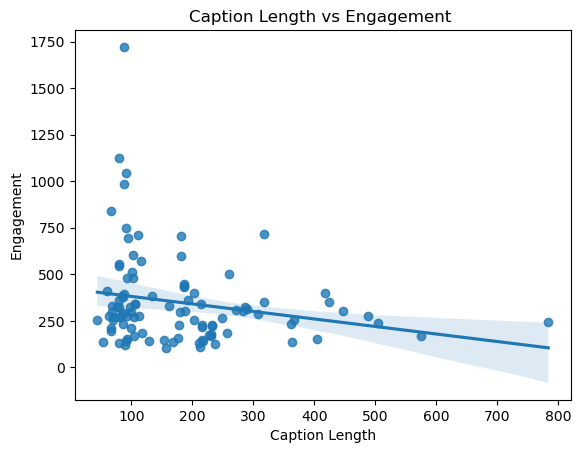

In [37]:
sns.regplot(x='Caption_length',  y='Engagement',  data=df)

plt.title('Caption Length vs Engagement ')
plt.xlabel('Caption Length')
plt.ylabel('Engagement')
plt.show()

## the relation between Caption Length and Total Engagement is negative 


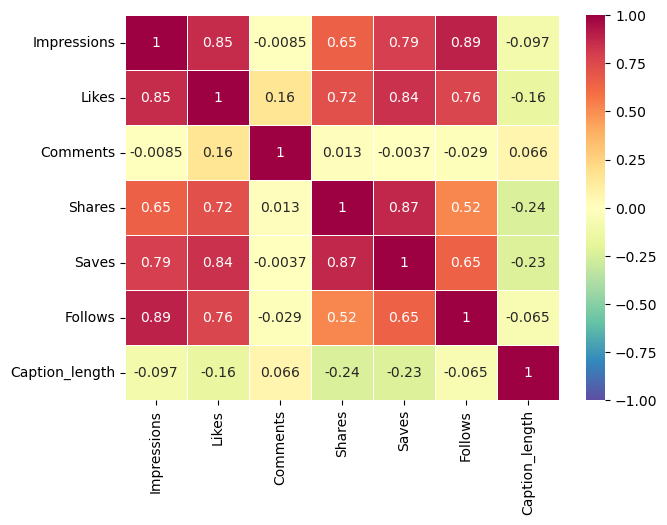

In [38]:
# Correlation Heatmap

corr = df[['Impressions','Likes','Comments','Shares','Saves','Follows','Caption_length']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="Spectral_r",vmin=-1,vmax=1,linewidths=.5)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()



In [39]:
##he data shows strong correlations between Impressions, Likes, Follows, and Saves (0.79–0.89), indicating that posts with higher visibility tend to receive more likes, saves, and follows. Shares also have a good correlation with Likes and Saves (0.72–0.87). Comments show little to no correlation with other metrics, suggesting they are largely independent. Caption length has a weak negative correlation with Likes, Shares, and Saves (-0.16 to -0.24), implying that text length has minimal impact.

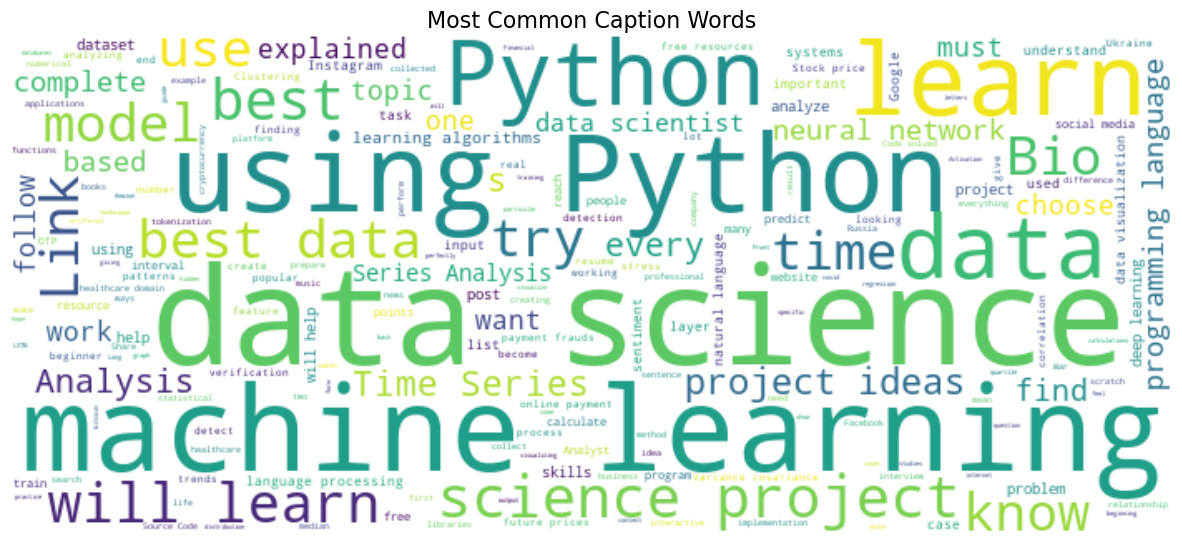

In [40]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(df['Caption'].astype(str))
wordcloud = WordCloud(width=700,height=300,background_color='white',stopwords=STOPWORDS,colormap='viridis').generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Caption Words", fontsize=16)
plt.show()

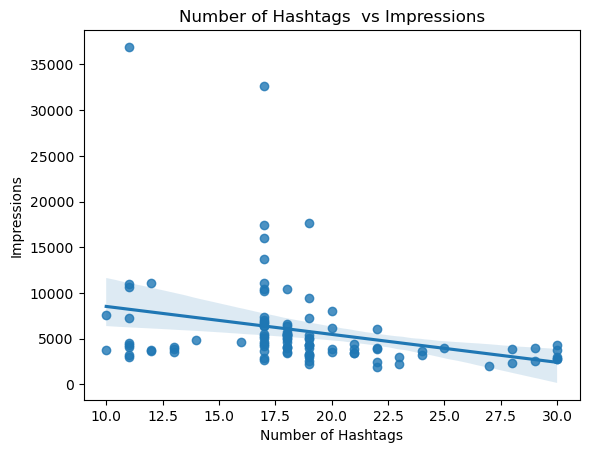

In [41]:
sns.regplot(x='Num_Hashtags',  y='Impressions',  data=df)

plt.title('Number of Hashtags  vs Impressions')
plt.xlabel('Number of Hashtags')
plt.ylabel('Impressions')
plt.show()

## the relation between number of hashtags and Impressions is a Negative Correlaion  


In [54]:
# determine the top 10 Engagement posts
df_sorted=df.sort_values(by='Engagement',ascending=False)
top_10_posts = df_sorted.head(10)


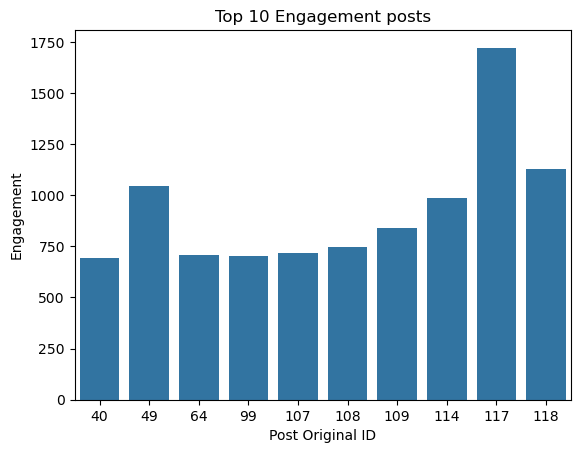

In [55]:
sns.barplot(x=top_10_posts.index, y=top_10_posts['Engagement'])
plt.xlabel('Post Original ID')
plt.title('Top 10 Engagement posts')
plt.show()

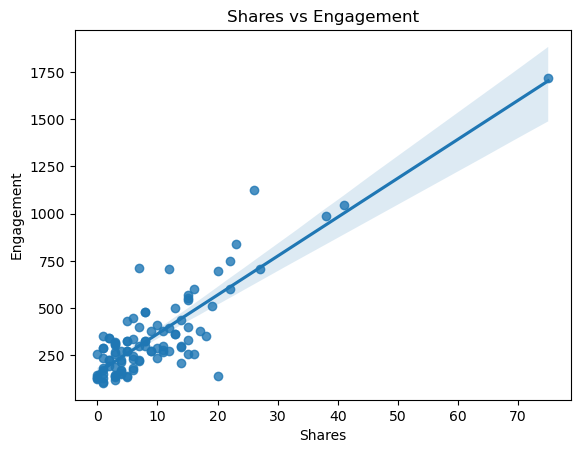

In [56]:
sns.regplot(x='Shares',  y='Engagement',  data=df)

plt.title('Shares vs Engagement')
plt.xlabel('Shares')
plt.ylabel('Engagement')
plt.show()